Dataset shape: (4238, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usa

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0


Missing values per column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

After filling missing values:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
After removing duplicates: (4238, 16)


/tmp/ipython-input-832822495.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


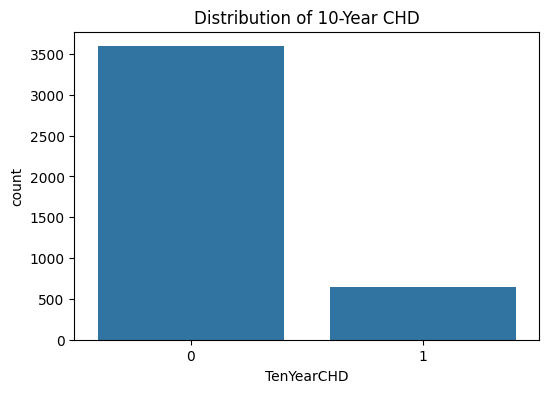

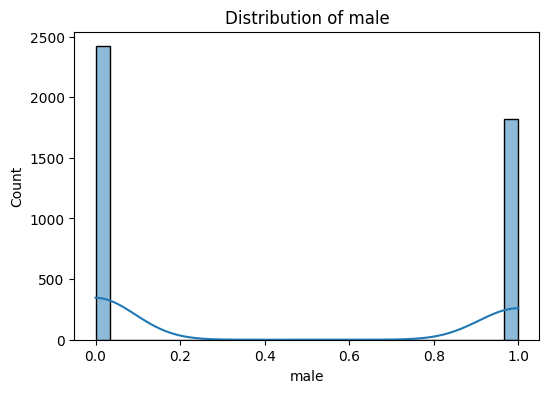

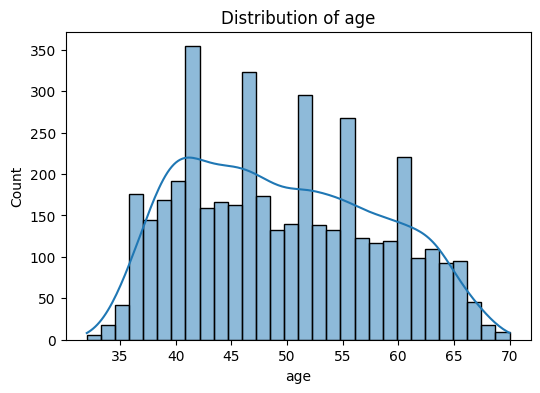

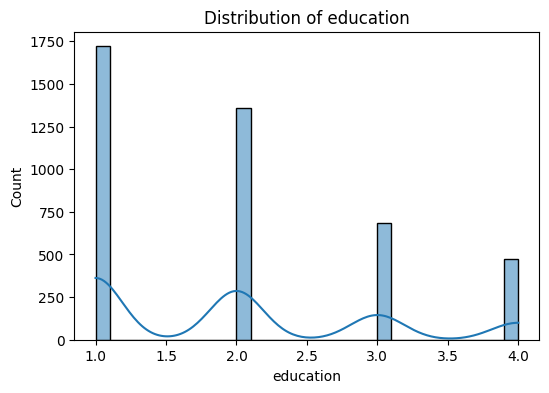

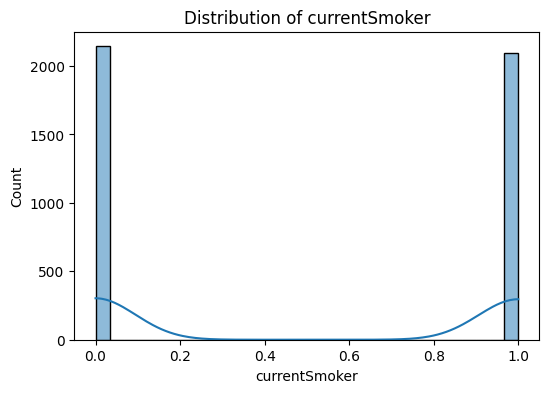

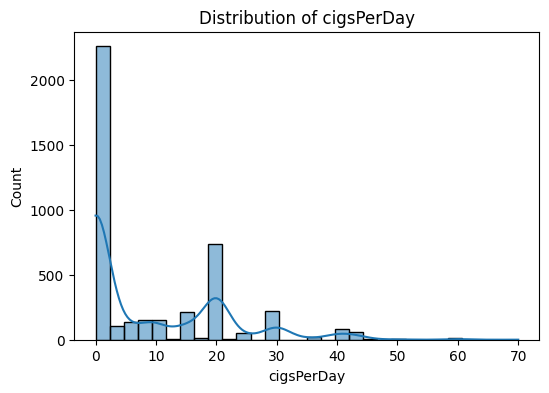

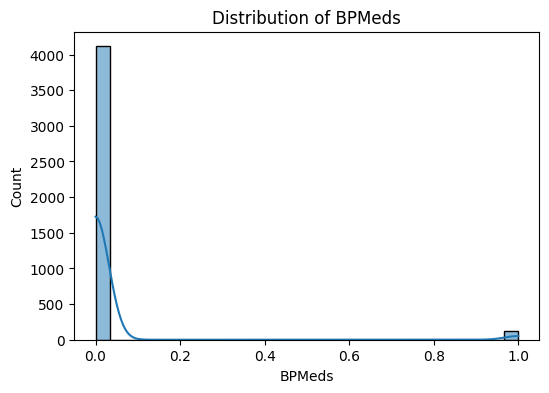

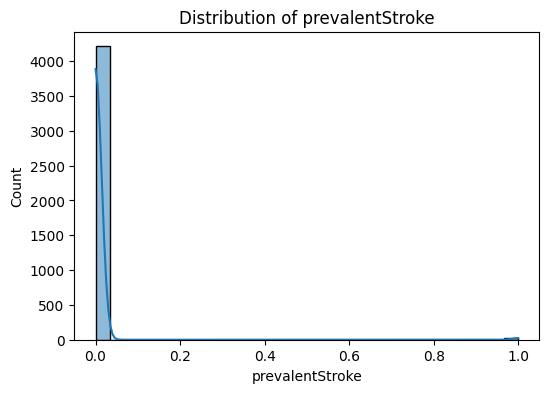

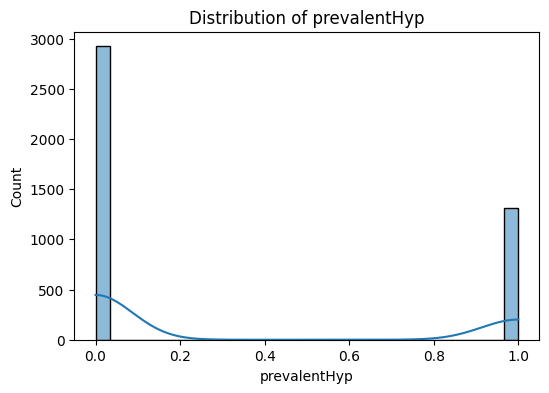

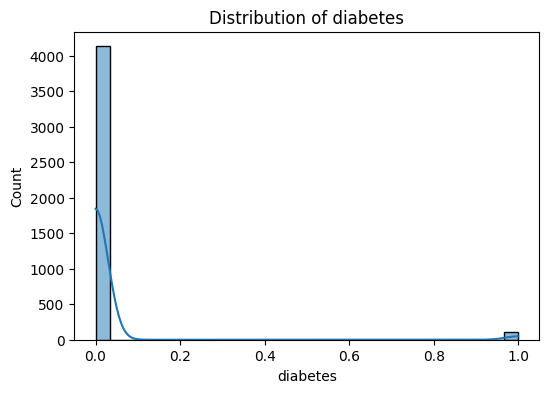

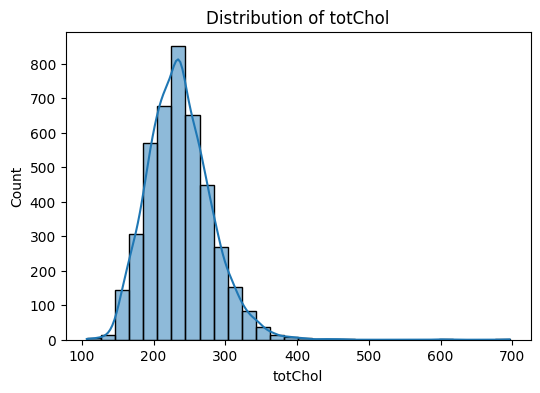

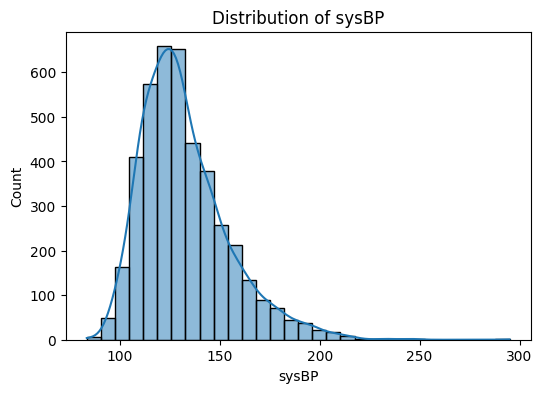

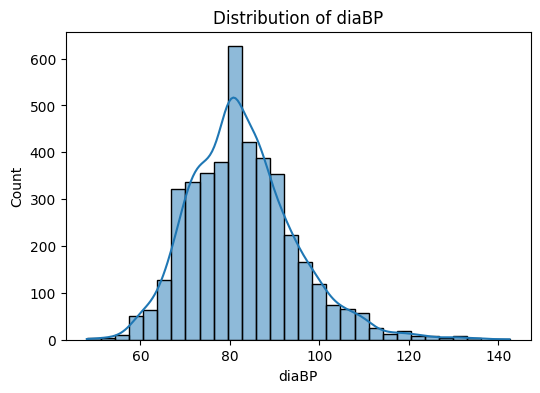

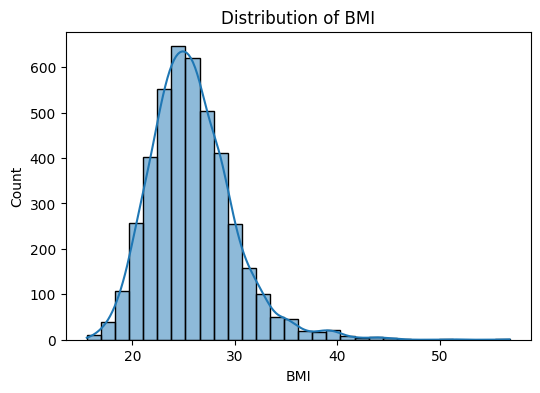

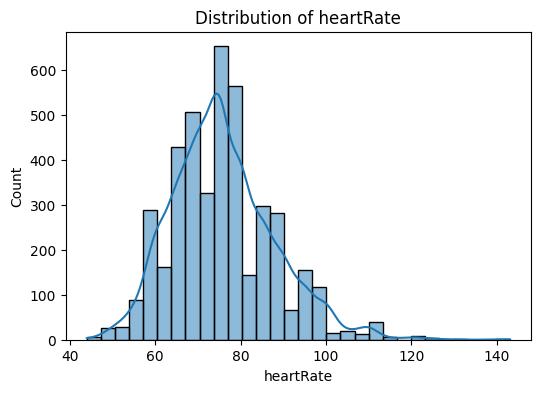

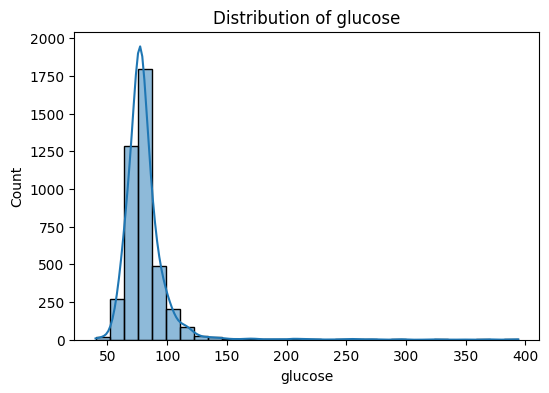

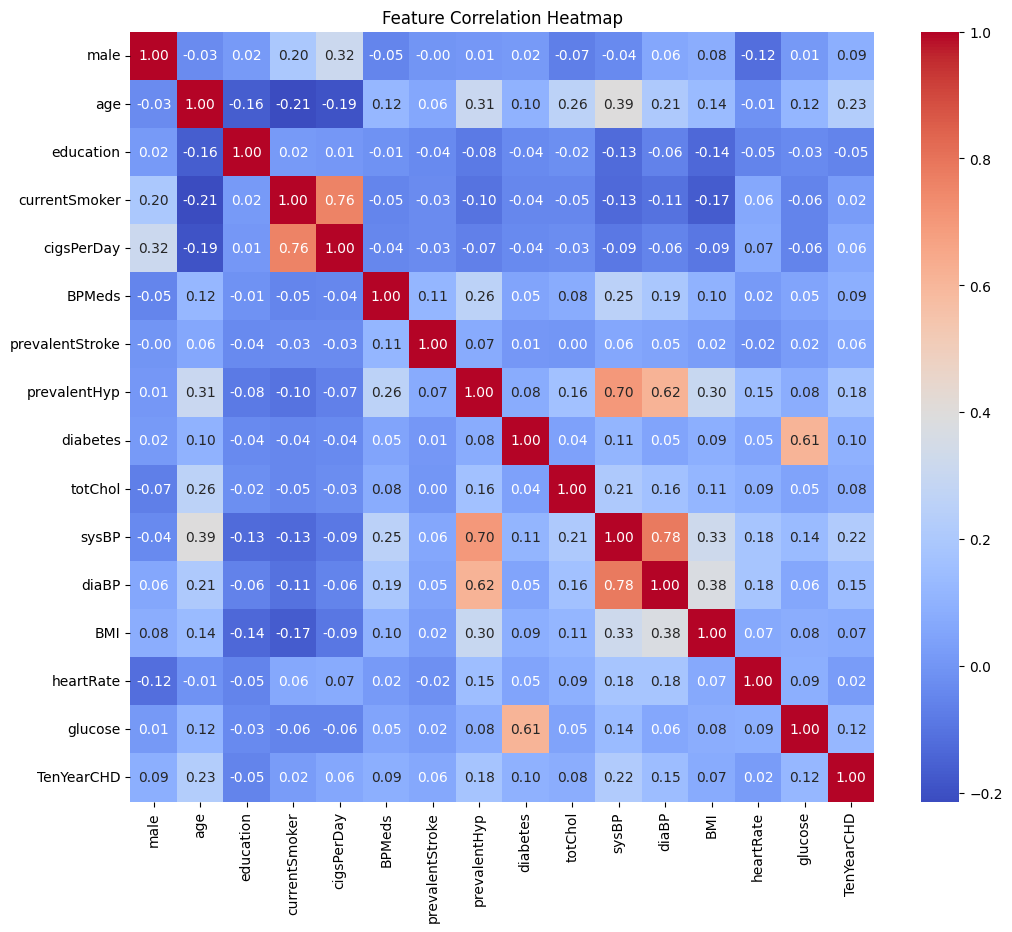

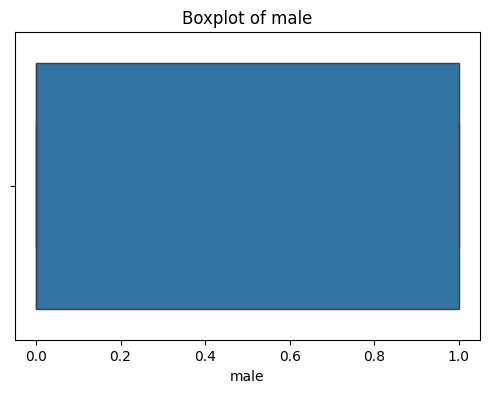

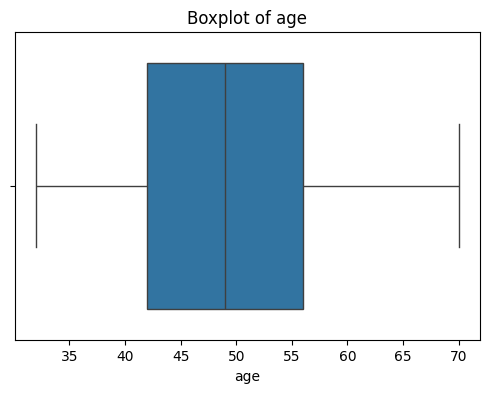

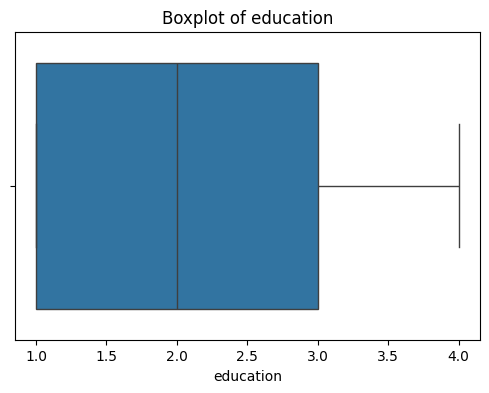

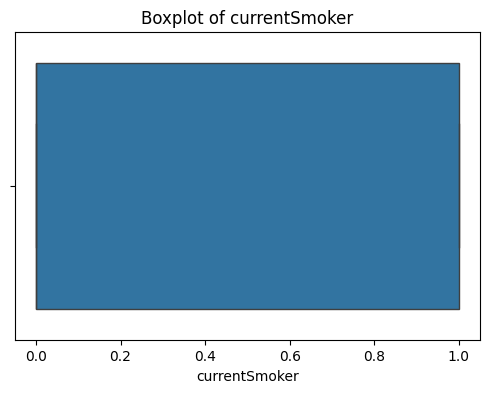

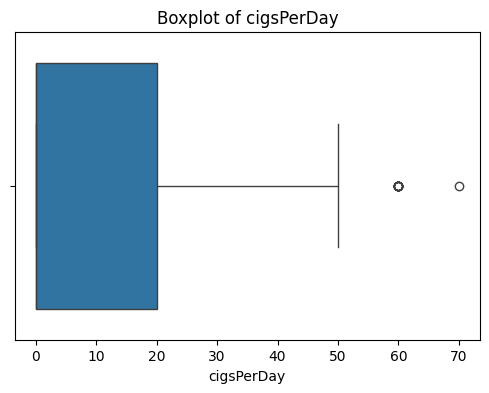

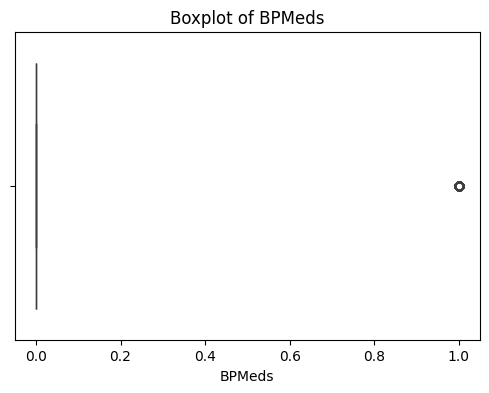

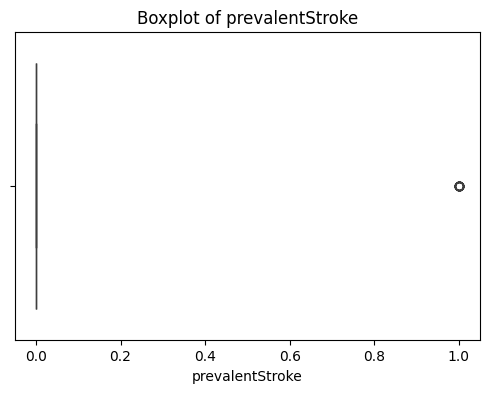

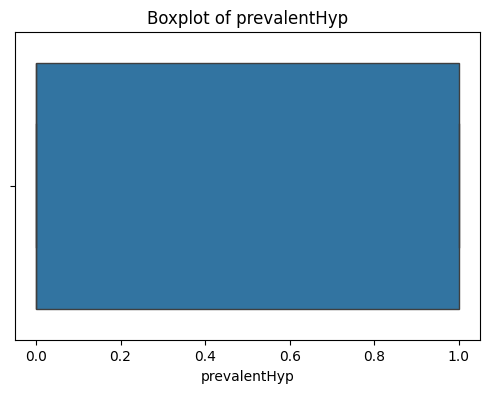

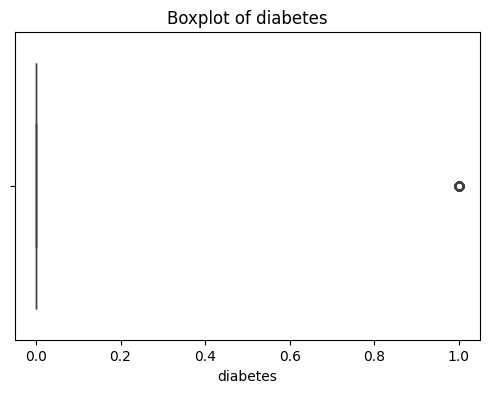

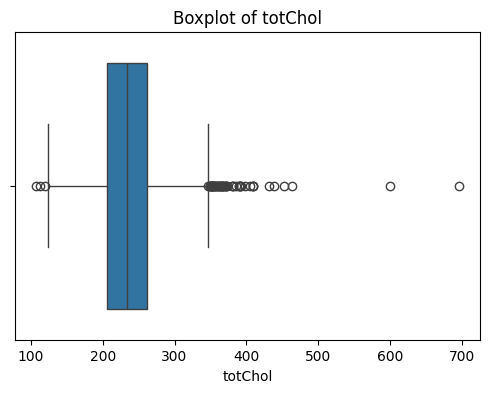

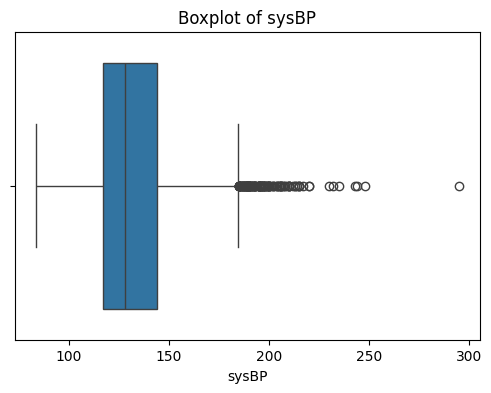

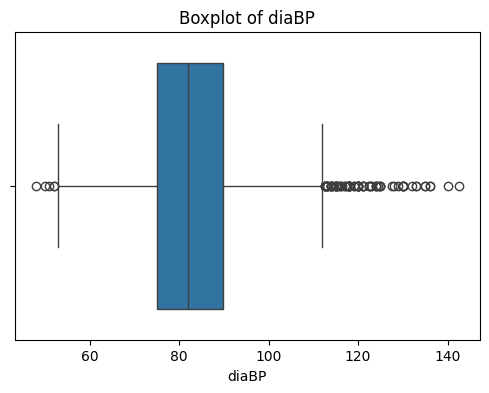

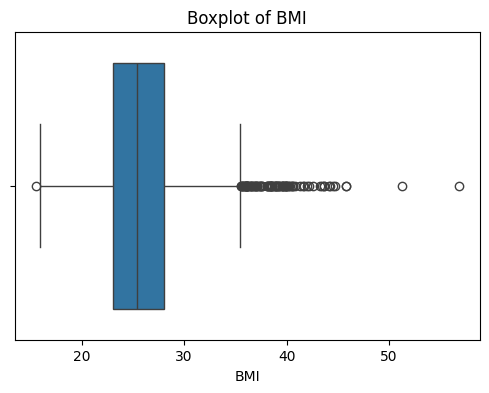

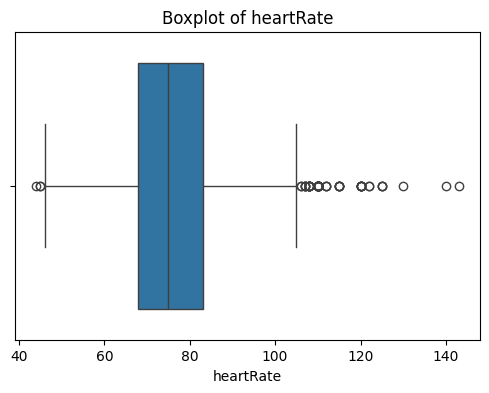

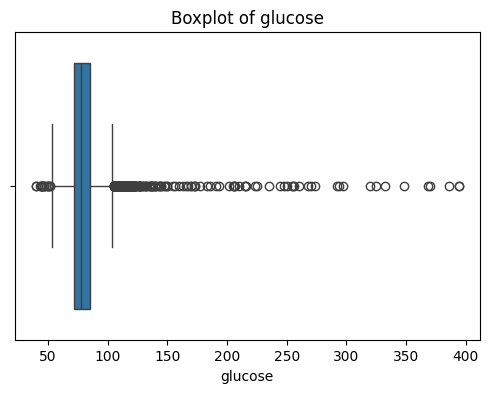

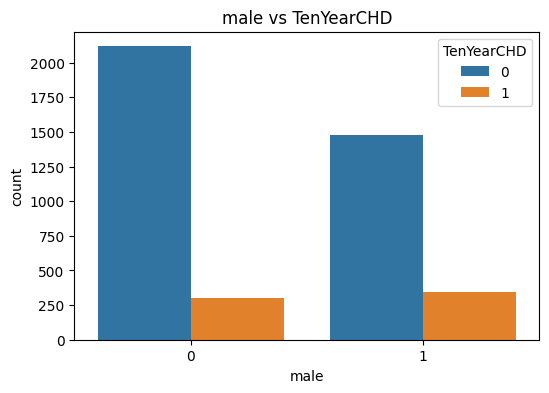

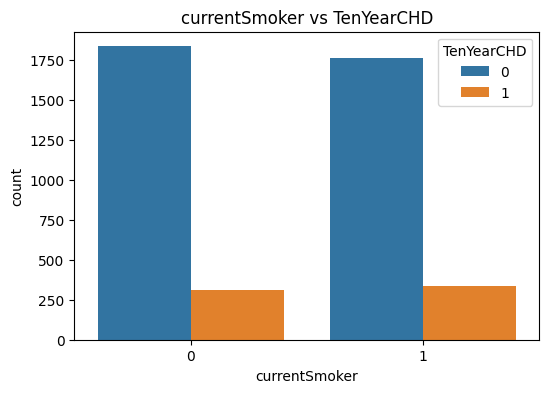

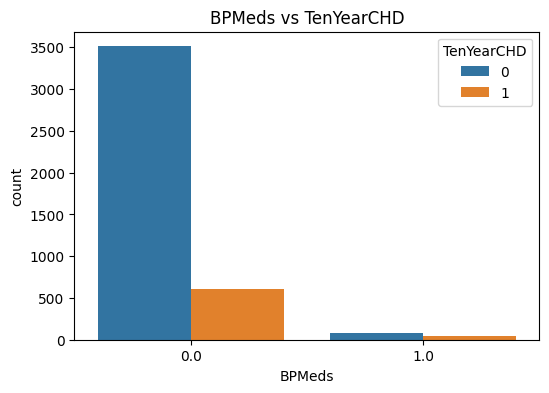

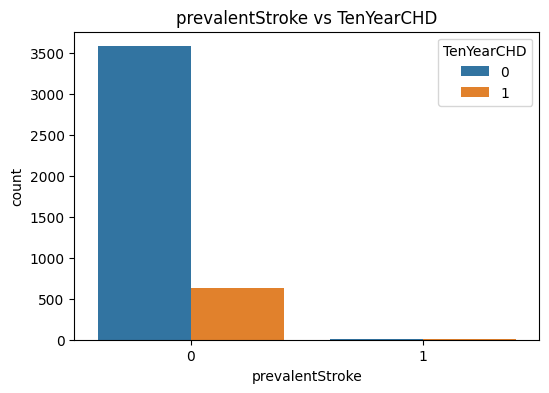

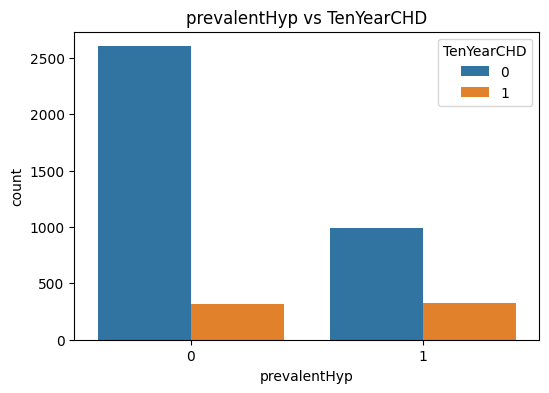

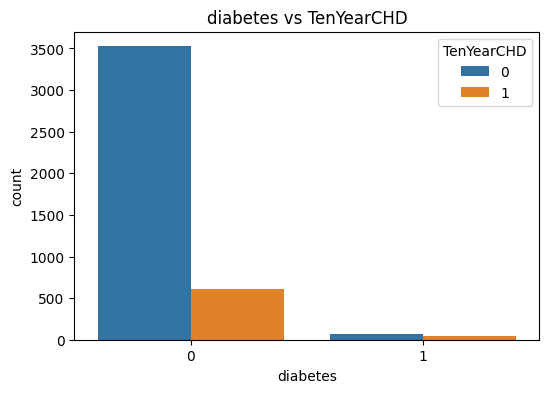

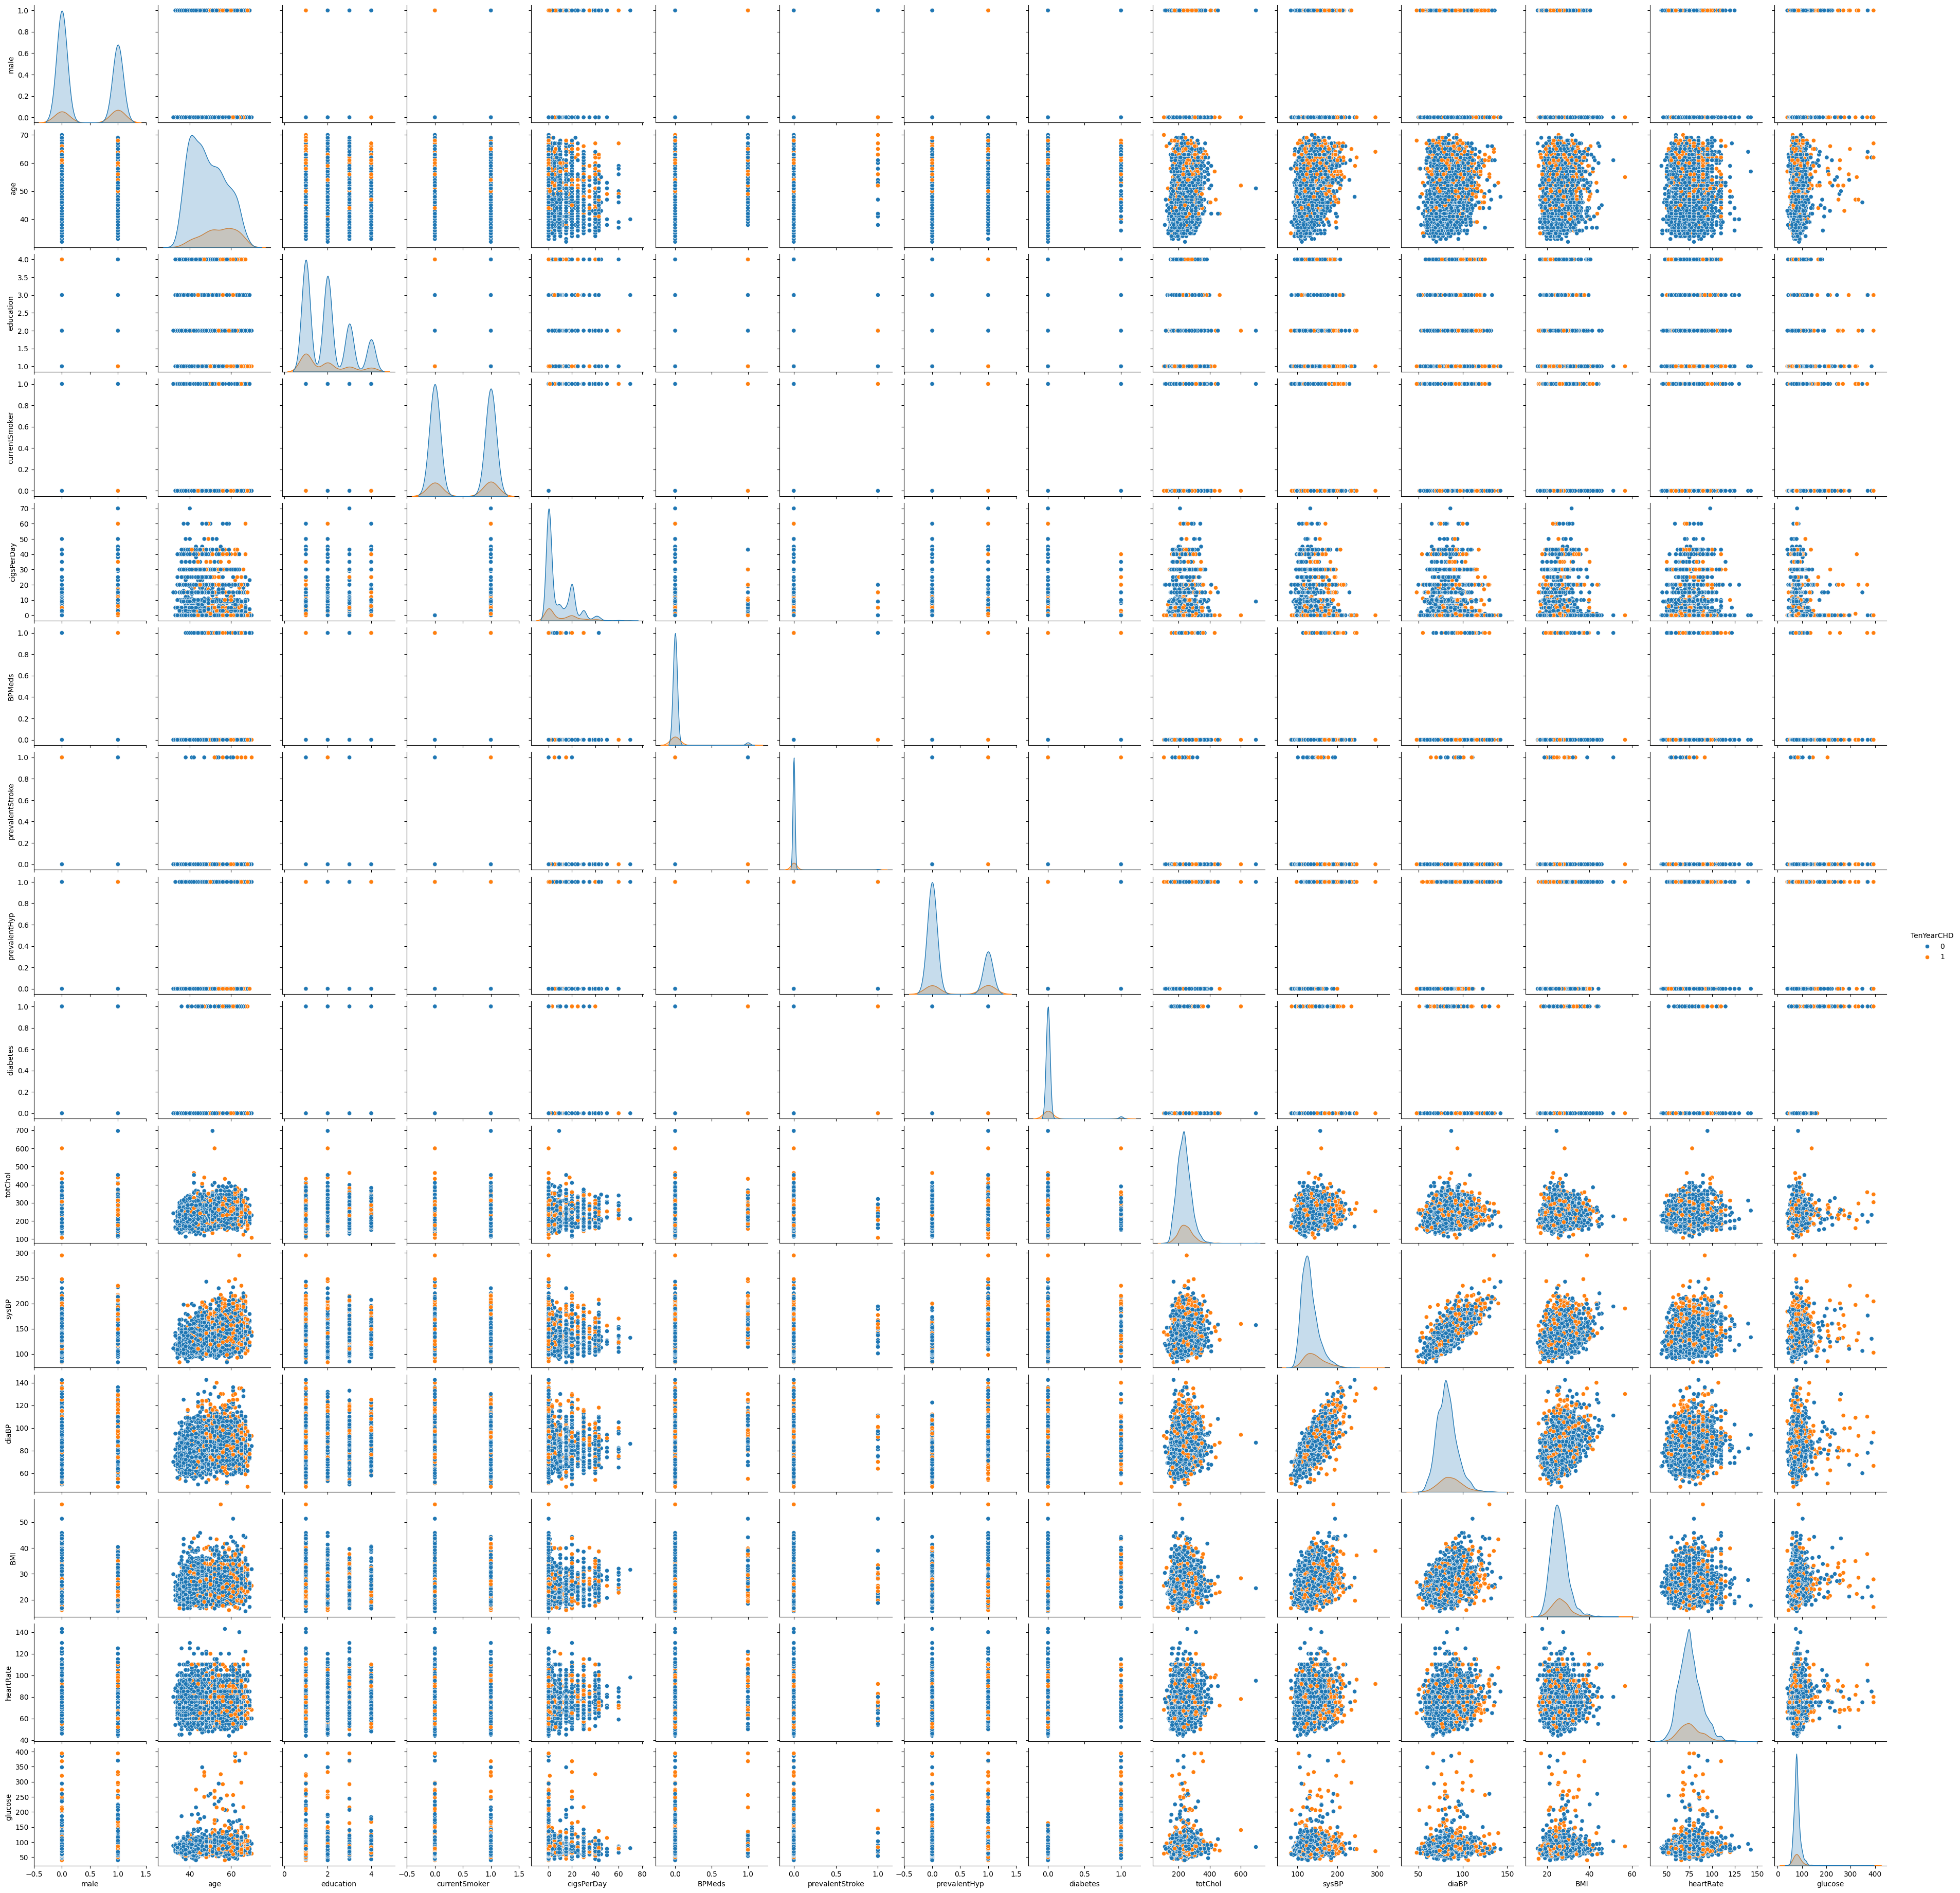

Scaled numeric features.

Top correlations with target:
 TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.121277
diabetes           0.097317
male               0.088428
BPMeds             0.086417
totChol            0.081566
BMI                0.074217
prevalentStroke    0.061810
cigsPerDay         0.058859
heartRate          0.022857
currentSmoker      0.019456
education         -0.053383
Name: TenYearCHD, dtype: float64

Mutual Information Scores:
 age                0.034659
sysBP              0.032955
diaBP              0.013325
prevalentStroke    0.012476
glucose            0.012253
prevalentHyp       0.011506
totChol            0.009483
male               0.007603
cigsPerDay         0.006932
BMI                0.004338
diabetes           0.003759
currentSmoker      0.002452
BPMeds             0.001698
education          0.000189
heartRate          0.000000
dtype: float6

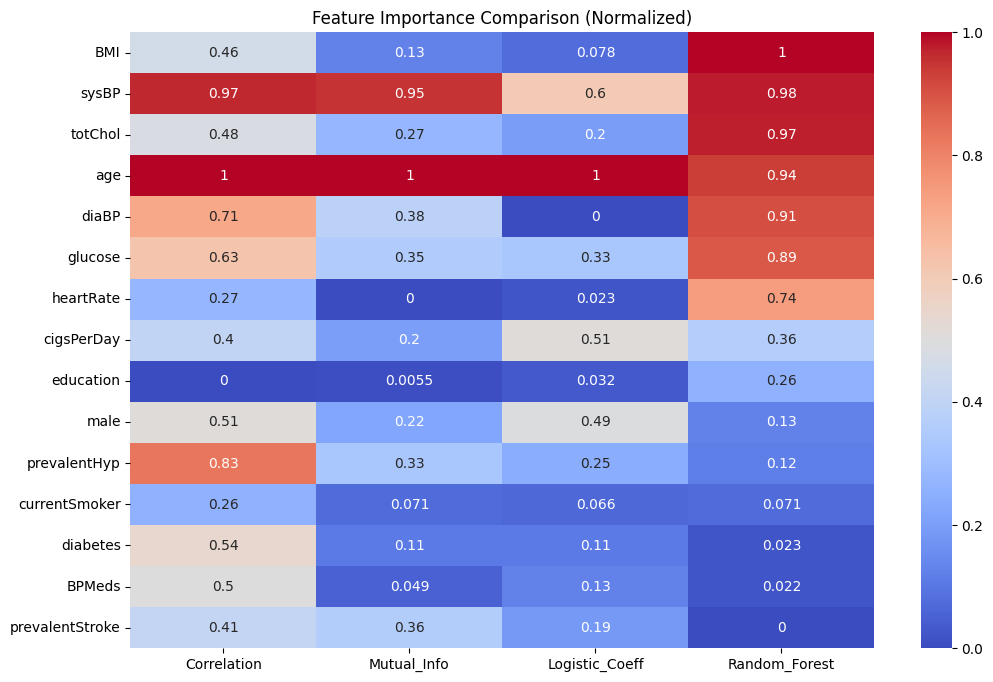

Top 5 features selected for modeling: ['age', 'sysBP', 'glucose', 'diaBP', 'totChol']

Model Accuracies on Test Set:
Logistic Regression: 0.8491
Random Forest: 0.8349
SVM: 0.8467
KNN: 0.8325


In [3]:
# --- Step 1: Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# --- Step 2: Load Dataset ---
df = pd.read_csv("framingham.csv")
print("Dataset shape:", df.shape)
df.info()
display(df.head())

# --- Step 3: Missing Values ---
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("\nAfter filling missing values:")
print(df.isnull().sum())

# --- Step 4: Remove duplicates ---
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

# --- Step 5: EDA ---

# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='TenYearCHD', data=df)
plt.title("Distribution of 10-Year CHD")
plt.show()

# Numerical feature distributions
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
num_cols.remove('TenYearCHD')

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots to detect outliers
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Categorical feature analysis
cat_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='TenYearCHD', data=df)
    plt.title(f'{col} vs TenYearCHD')
    plt.show()

# Pairplot (optional)
sns.pairplot(df[num_cols + ['TenYearCHD']], hue='TenYearCHD')
plt.show()

# --- Step 6: Scaling ---
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("Scaled numeric features.")

# --- Step 7: Feature Selection ---

# Separate features and target
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD'].astype(int)  # Ensure discrete target

# 7a. Correlation with target
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix['TenYearCHD'].sort_values(ascending=False)
print("\nTop correlations with target:\n", target_corr)

# 7b. Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\nMutual Information Scores:\n", mi_series)

# 7c. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)
logreg_coefs = pd.Series(logreg.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print("\nLogistic Regression Coefficients:\n", logreg_coefs)

# 7d. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importances:\n", rf_importances)

# 7e. Combine metrics
summary_df = pd.DataFrame({
    'Correlation': target_corr.drop('TenYearCHD'),
    'Mutual_Info': mi_series,
    'Logistic_Coeff': logreg_coefs,
    'Random_Forest': rf_importances
})

# Normalize metrics
normalized_df = summary_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df.sort_values('Random_Forest', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Importance Comparison (Normalized)')
plt.show()

# --- Step 8: Select Top 5 Features ---
normalized_df['Combined_Score'] = normalized_df.mean(axis=1)
top_features = normalized_df.sort_values('Combined_Score', ascending=False).head(5)
top_feature_names = top_features.index.tolist()
print("Top 5 features selected for modeling:", top_feature_names)

# --- Step 9: Train ML Models ---
X_top = X[top_feature_names]
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

print("\nModel Accuracies on Test Set:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")

In [ ]:
# --- Step 1-8: (Use your existing pipeline up to top 5 features selection) ---
# Keep all your preprocessing, EDA, scaling, and feature selection code
# After Step 8 you already have:
# top_feature_names = top 5 features list

# --- Step 9: Train ML Models with Advanced Boosting ---
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_top = X[top_feature_names]
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

print("\nModel Accuracies on Test Set (Top 5 Features):")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")



Model Accuracies on Test Set (Top 5 Features):
Logistic Regression: 0.8479
Random Forest: 0.8373
Gradient Boosting: 0.8408


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:42:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: 0.8208


Dataset shape: (4240, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usa

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

/tmp/ipython-input-2906190145.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


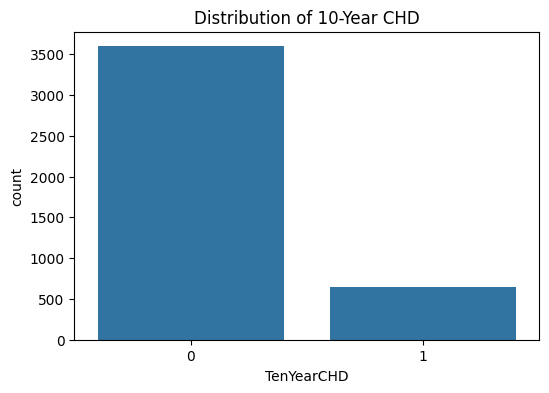

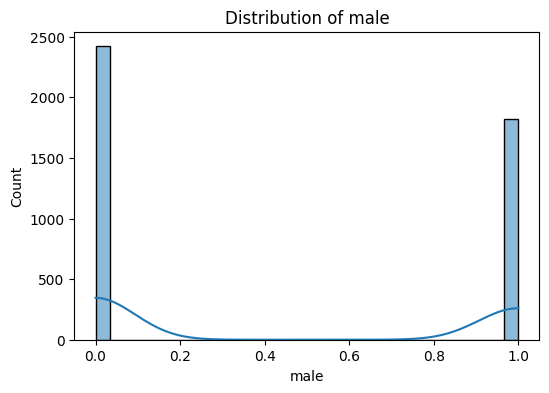

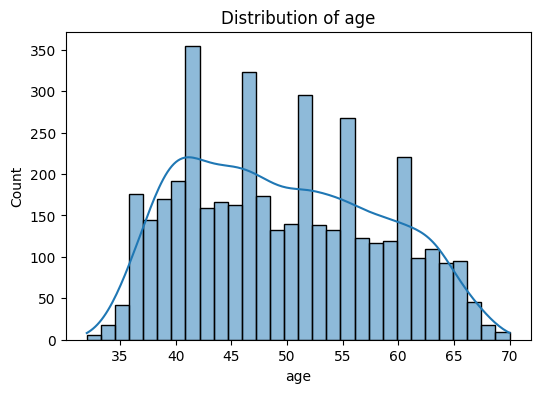

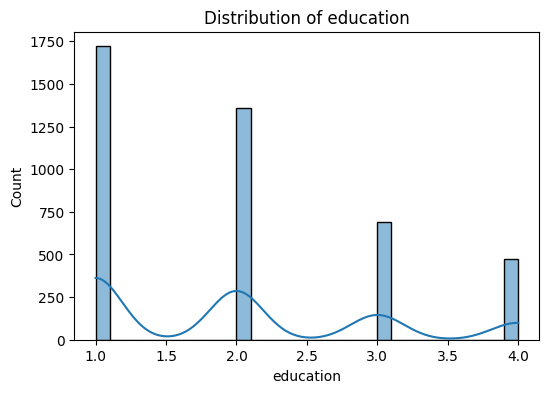

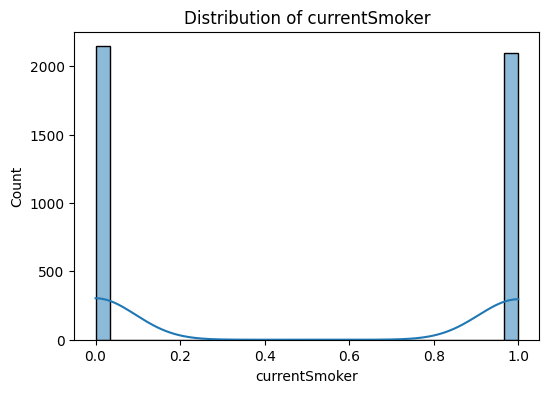

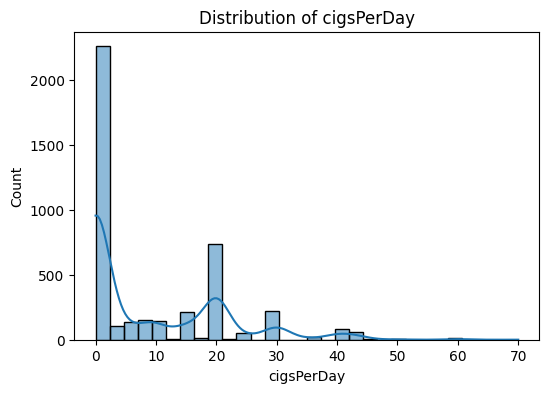

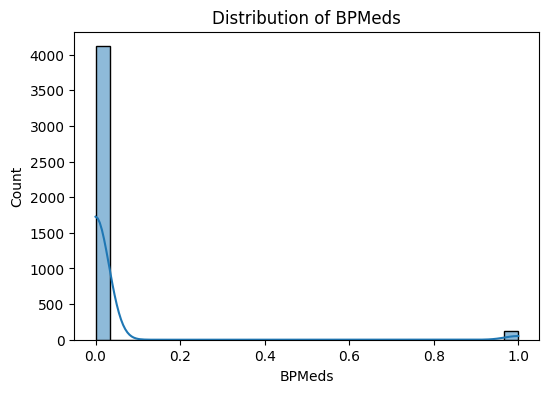

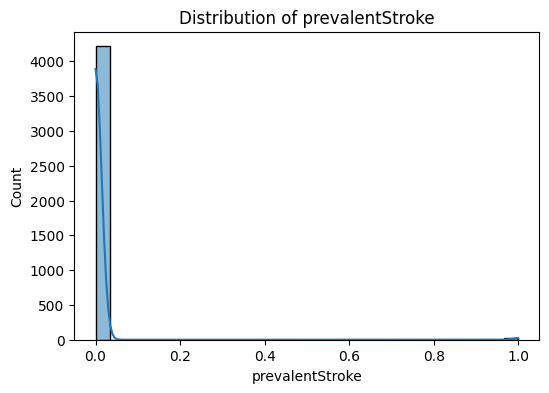

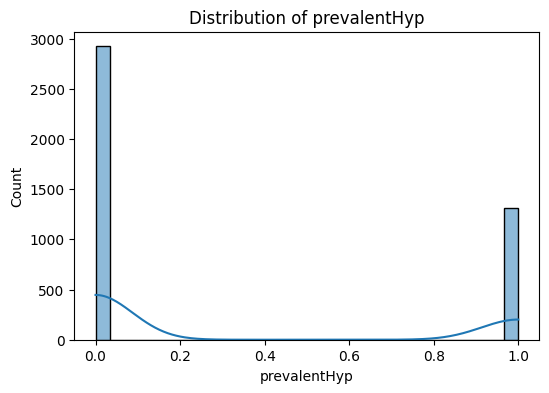

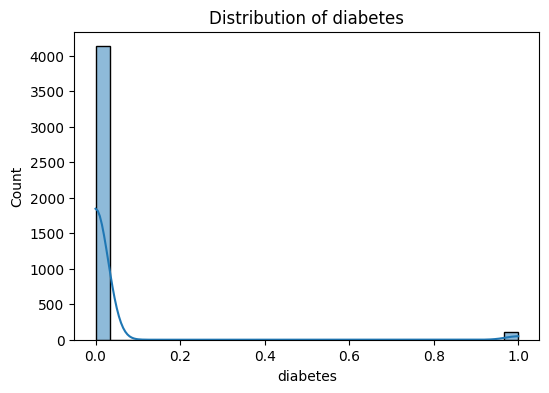

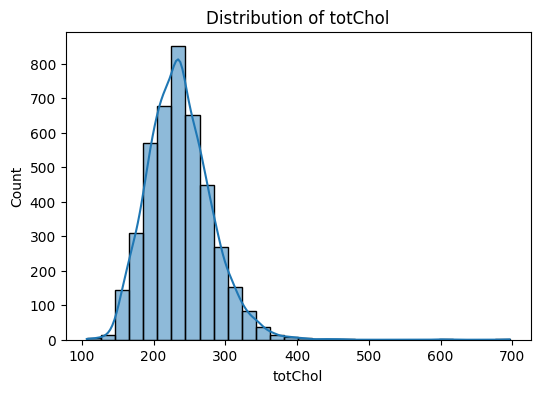

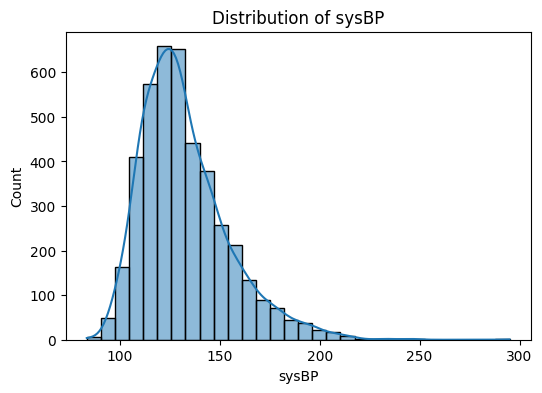

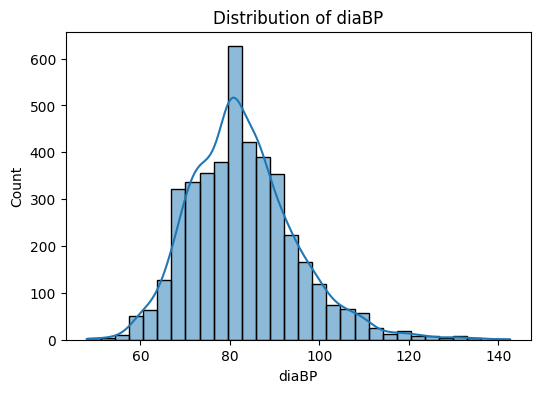

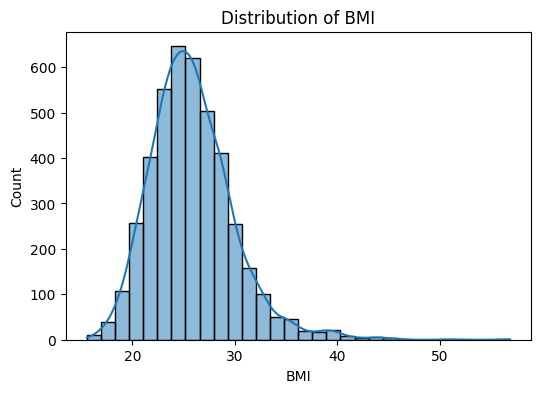

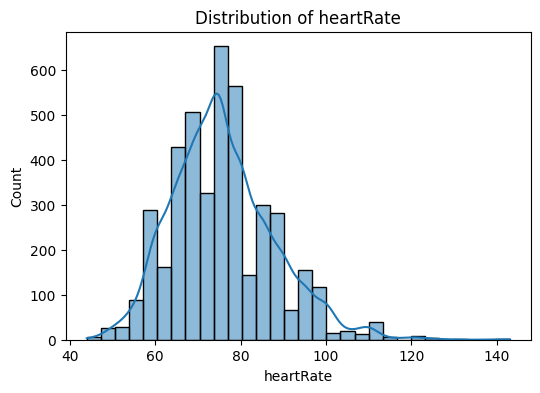

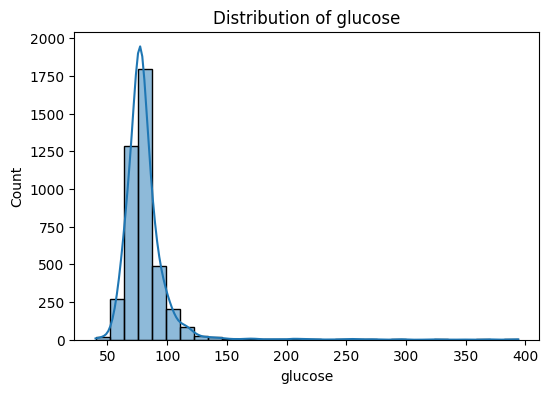

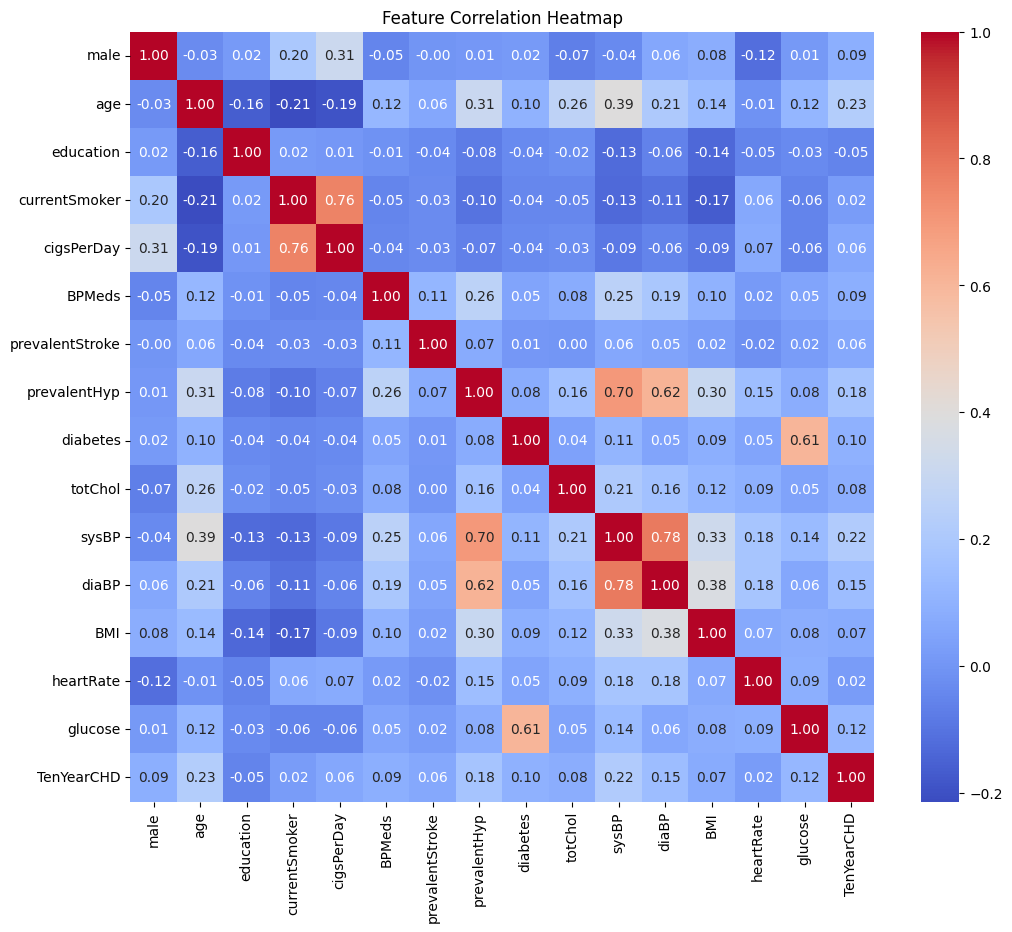

Top 5 features selected: ['age', 'sysBP', 'glucose', 'diaBP', 'totChol']

Logistic Regression Performance:
Accuracy: 0.8479
Precision: 0.5000
Recall: 0.0310
F1-score: 0.0584
Confusion Matrix:
[[715   4]
 [125   4]]

Random Forest Performance:
Accuracy: 0.8373
Precision: 0.3043
Recall: 0.0543
F1-score: 0.0921
Confusion Matrix:
[[703  16]
 [122   7]]

Gradient Boosting Performance:
Accuracy: 0.8408
Precision: 0.3333
Recall: 0.0465
F1-score: 0.0816
Confusion Matrix:
[[707  12]
 [123   6]]

XGBoost Performance:
Accuracy: 0.8208
Precision: 0.2195
Recall: 0.0698
F1-score: 0.1059
Confusion Matrix:
[[687  32]
 [120   9]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:45:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



SVM Performance:
Accuracy: 0.8502
Precision: 1.0000
Recall: 0.0155
F1-score: 0.0305
Confusion Matrix:
[[719   0]
 [127   2]]

KNN Performance:
Accuracy: 0.8314
Precision: 0.3056
Recall: 0.0853
F1-score: 0.1333
Confusion Matrix:
[[694  25]
 [118  11]]


In [ ]:
# --- Step 1: Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# --- Step 2: Load Dataset ---
df = pd.read_csv("framingham.csv")
print("Dataset shape:", df.shape)
df.info()
display(df.head())

# --- Step 3: Missing Values ---
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# --- Step 4: Remove duplicates ---
df.drop_duplicates(inplace=True)

# --- Step 5: EDA (Optional visualizations) ---
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='TenYearCHD', data=df)
plt.title("Distribution of 10-Year CHD")
plt.show()

# Numerical distributions
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
num_cols.remove('TenYearCHD')
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# --- Step 6: Scaling ---
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# --- Step 7: Feature Selection ---
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD'].astype(int)

# Correlation with target
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix['TenYearCHD'].sort_values(ascending=False)

# Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)
logreg_coefs = pd.Series(logreg.coef_[0], index=X.columns)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Combine metrics
summary_df = pd.DataFrame({
    'Correlation': target_corr.drop('TenYearCHD'),
    'Mutual_Info': mi_series,
    'Logistic_Coeff': logreg_coefs,
    'Random_Forest': rf_importances
})
normalized_df = summary_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Top 5 features based on combined normalized score
normalized_df['Combined_Score'] = normalized_df.mean(axis=1)
top_features = normalized_df.sort_values('Combined_Score', ascending=False).head(5)
top_feature_names = top_features.index.tolist()
print("Top 5 features selected:", top_feature_names)

# --- Step 8: Train-Test Split ---
X_top = X[top_feature_names]
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 9: Define Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# --- Step 10: Train & Evaluate ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)


                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.847877   0.500000  0.031008  0.058394
1        Random Forest  0.837264   0.304348  0.054264  0.092105
2    Gradient Boosting  0.840802   0.333333  0.046512  0.081633
3              XGBoost  0.820755   0.219512  0.069767  0.105882
4                  SVM  0.850236   1.000000  0.015504  0.030534
5                  KNN  0.831368   0.305556  0.085271  0.133333


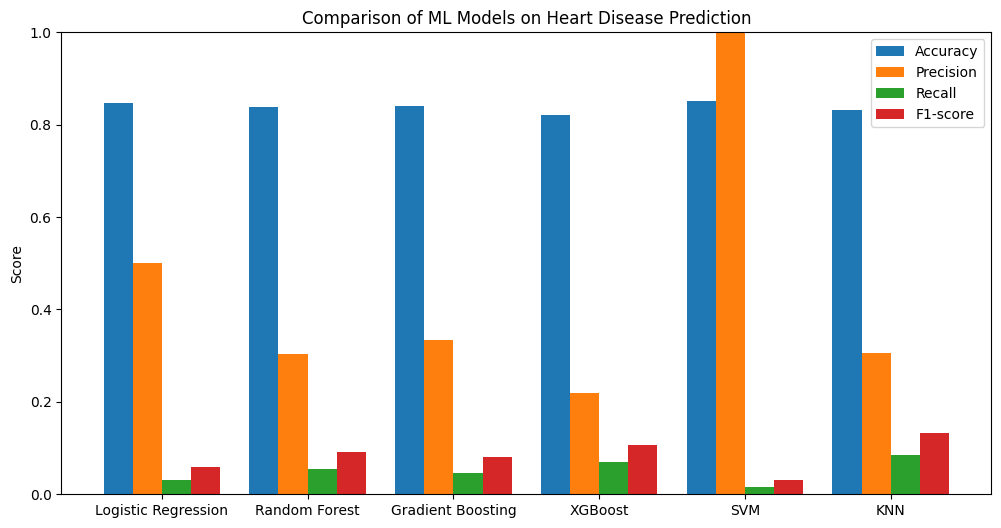

In [ ]:
import matplotlib.pyplot as plt

# --- Step 1: Collect metrics for each model ---
model_names = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    model_names.append(name)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))

# --- Step 2: Create DataFrame for visualization ---
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-score': f1_list
})

print(metrics_df)

# --- Step 3: Plot metrics ---
plt.figure(figsize=(12,6))
bar_width = 0.2
r1 = range(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]

plt.bar(r1, metrics_df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(r2, metrics_df['Precision'], width=bar_width, label='Precision')
plt.bar(r3, metrics_df['Recall'], width=bar_width, label='Recall')
plt.bar(r4, metrics_df['F1-score'], width=bar_width, label='F1-score')

plt.xticks([r + bar_width*1.5 for r in range(len(model_names))], model_names)
plt.ylabel("Score")
plt.title("Comparison of ML Models on Heart Disease Prediction")
plt.ylim(0, 1)
plt.legend()
plt.show()
